In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [15]:
df=pd.read_csv('IndianWeatherRepository.csv')

In [16]:
df.head(5)

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,12.6,18.5,1,2,05:59 AM,06:41 PM,05:42 PM,03:38 AM,Waxing Gibbous,93
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,10.7,14.2,1,1,06:00 AM,06:40 PM,05:39 PM,03:41 AM,Waxing Gibbous,93
2,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693286100,2023-08-29 10:45,26.3,79.3,...,16.8,20.7,2,2,05:56 AM,06:34 PM,05:32 PM,03:39 AM,Waxing Gibbous,93
3,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693286100,2023-08-29 10:45,25.6,78.1,...,4.9,6.6,1,1,06:00 AM,06:38 PM,05:36 PM,03:43 AM,Waxing Gibbous,93
4,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.2,81.0,...,11.4,14.8,1,1,06:01 AM,06:39 PM,05:38 PM,03:42 AM,Waxing Gibbous,93


In [17]:
df.columns

Index(['country', 'location_name', 'region', 'latitude', 'longitude',
       'timezone', 'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

In [18]:
df.drop('country',axis='columns')

,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,Partly cloudy,...,12.6,18.5,1,2,05:59 AM,06:41 PM,05:42 PM,03:38 AM,Waxing Gibbous,93
1,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,Sunny,...,10.7,14.2,1,1,06:00 AM,06:40 PM,05:39 PM,03:41 AM,Waxing Gibbous,93
2,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693286100,2023-08-29 10:45,26.3,79.3,Partly cloudy,...,16.8,20.7,2,2,05:56 AM,06:34 PM,05:32 PM,03:39 AM,Waxing Gibbous,93
3,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693286100,2023-08-29 10:45,25.6,78.1,Cloudy,...,4.9,6.6,1,1,06:00 AM,06:38 PM,05:36 PM,03:43 AM,Waxing Gibbous,93
4,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.2,81.0,Cloudy,...,11.4,14.8,1,1,06:01 AM,06:39 PM,05:38 PM,03:42 AM,Waxing Gibbous,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30088,Niwari,Uttar Pradesh,28.88,77.53,Asia/Kolkata,1697922000,2023-10-22 02:30,21.0,69.8,Mist,...,144.9,192.0,4,10,06:24 AM,05:45 PM,12:45 PM,10:57 PM,Waxing Crescent,37
30089,Saitual,Mizoram,23.97,92.58,Asia/Kolkata,1697922000,2023-10-22 02:30,20.2,68.4,Patchy rain possible,...,45.4,53.3,3,5,05:20 AM,04:49 PM,11:29 AM,10:07 PM,Waxing Crescent,37
30090,Ranipet,Tamil Nadu,12.93,79.33,Asia/Kolkata,1697922000,2023-10-22 02:30,23.3,74.0,Clear,...,81.1,88.7,4,10,06:04 AM,05:51 PM,11:57 AM,11:29 PM,Waxing Crescent,37
30091,Tenkasi,Tamil Nadu,8.97,77.30,Asia/Kolkata,1697922000,2023-10-22 02:30,22.7,72.9,Patchy rain possible,...,48.7,51.2,3,6,06:09 AM,06:02 PM,11:56 AM,11:46 PM,Waxing Crescent,37


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,30093.0,2.309818e+01,5.796167e+00,8.080000e+00,2.027000e+01,2.397000e+01,2.677000e+01,3.457000e+01
longitude,30093.0,8.023817e+01,5.757778e+00,6.897000e+01,7.607000e+01,7.869000e+01,8.390000e+01,9.580000e+01
last_updated_epoch,30093.0,1.695596e+09,1.366390e+06,1.693286e+09,1.694387e+09,1.695594e+09,1.696799e+09,1.697922e+09
temperature_celsius,30093.0,2.383738e+01,4.143489e+00,-1.090000e+01,2.240000e+01,2.430000e+01,2.610000e+01,3.830000e+01
temperature_fahrenheit,30093.0,7.490728e+01,7.457519e+00,1.240000e+01,7.230000e+01,7.580000e+01,7.900000e+01,1.009000e+02
wind_mph,30093.0,5.190779e+00,3.118191e+00,2.200000e+00,2.700000e+00,4.300000e+00,6.500000e+00,2.680000e+01
wind_kph,30093.0,8.359117e+00,5.010900e+00,3.600000e+00,4.300000e+00,6.800000e+00,1.040000e+01,4.320000e+01
wind_degree,30093.0,1.810548e+02,1.044605e+02,1.000000e+00,8.100000e+01,2.030000e+02,2.700000e+02,3.600000e+02
pressure_mb,30093.0,1.007338e+03,3.982449e+00,9.970000e+02,1.004000e+03,1.007000e+03,1.010000e+03,1.027000e+03
pressure_in,30093.0,2.974622e+01,1.174789e-01,2.944000e+01,2.966000e+01,2.973000e+01,2.983000e+01,3.033000e+01


In [20]:
df.isna().sum()

country                         0
location_name                   0
region                          0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Oz

In [21]:
df.shape

(30093, 42)

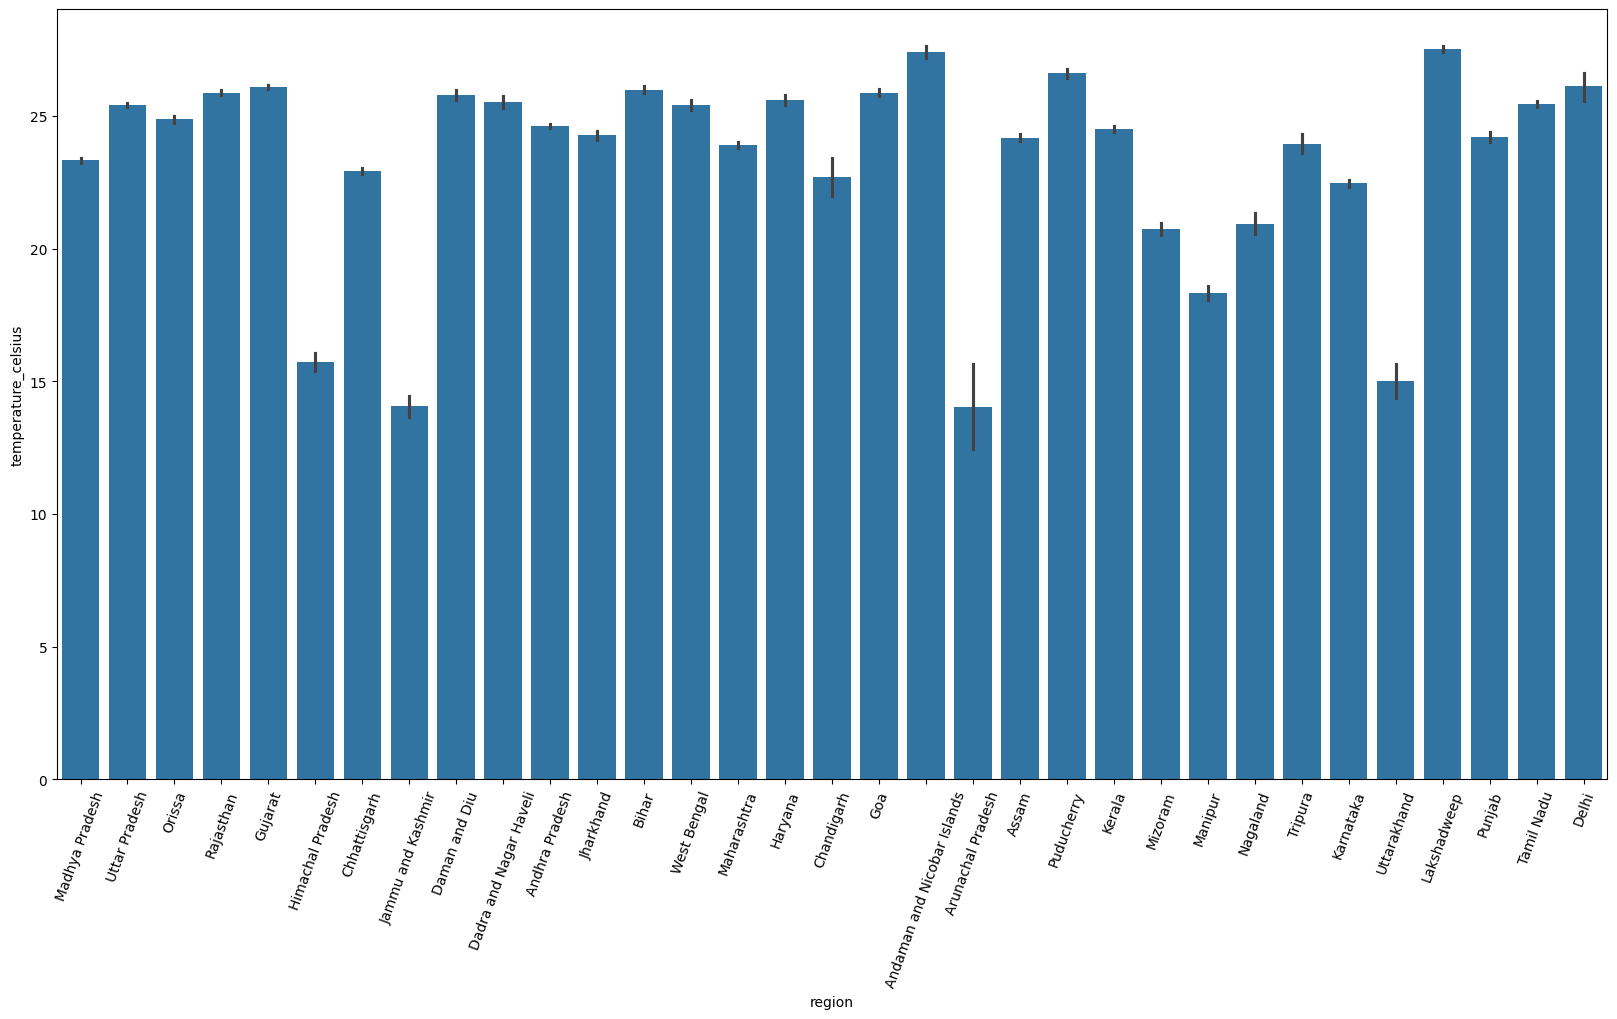

In [22]:
plt.figure(figsize=(20,10))
sns.barplot(x=df.region,y=df.temperature_celsius)
plt.xticks(rotation=70)
plt.show()

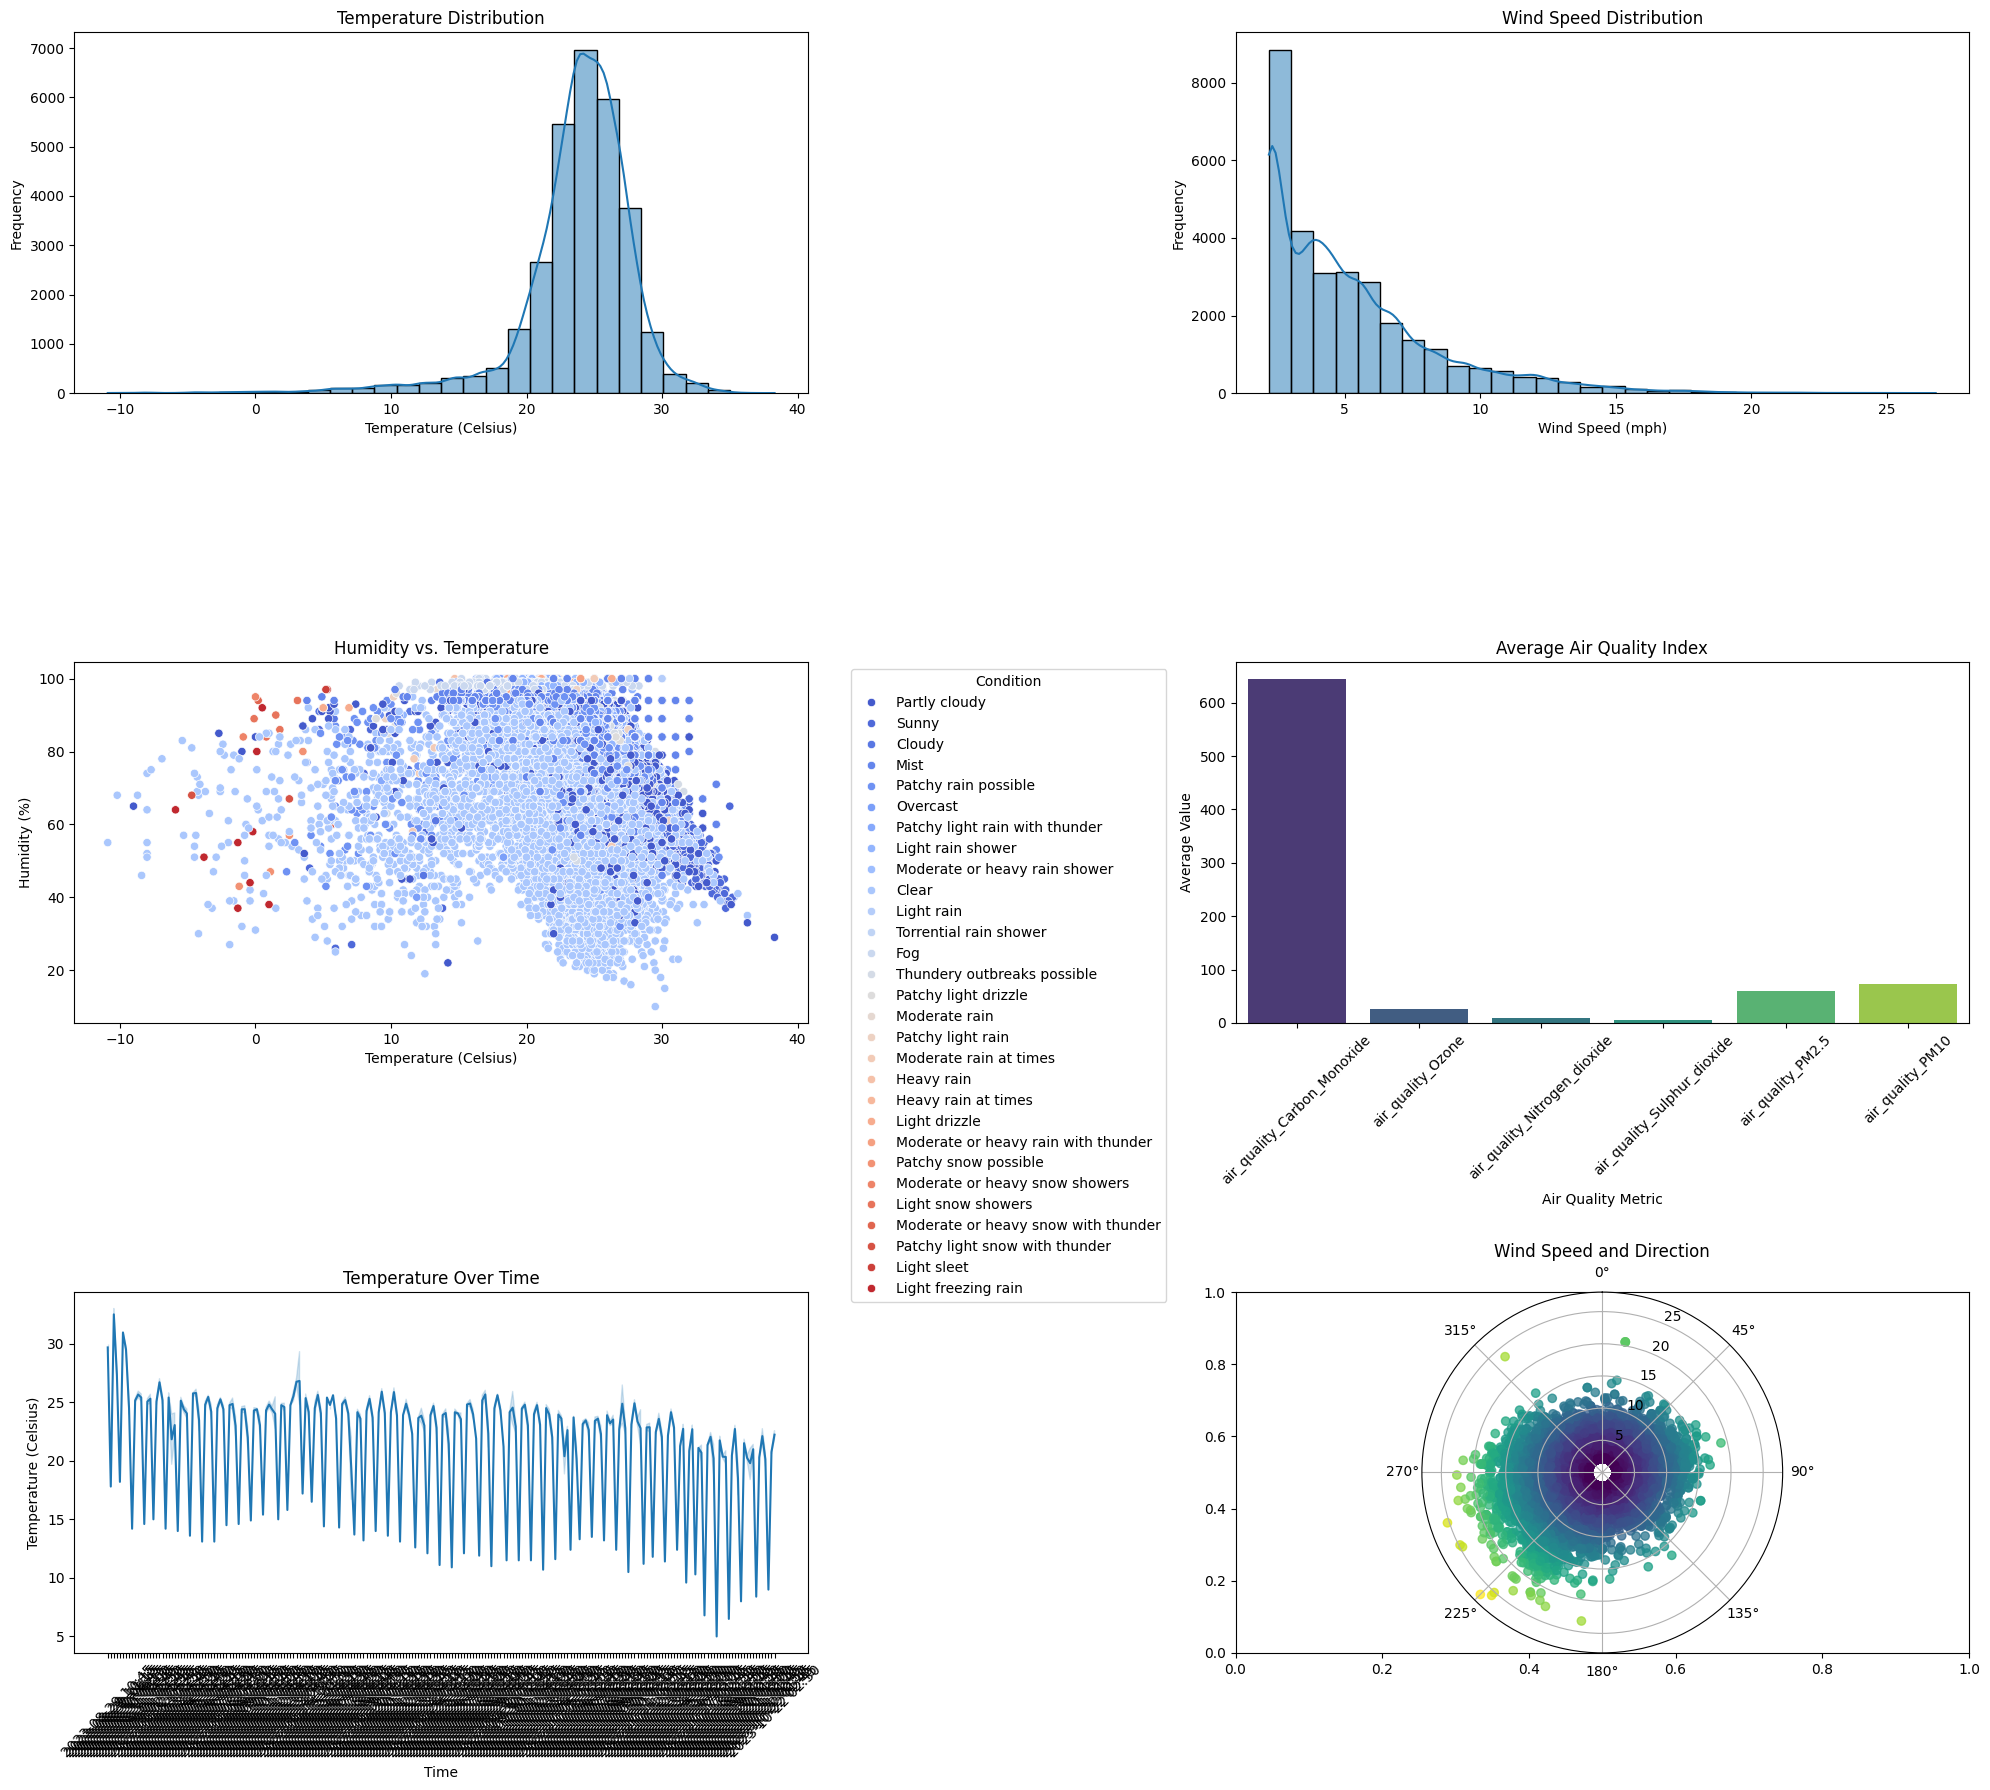

In [23]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 18))

# Temperature Distribution
sns.histplot(data=df, x='temperature_celsius', bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_xlabel('Temperature (Celsius)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Temperature Distribution')

# Wind Speed Distribution
sns.histplot(data=df, x='wind_mph', bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_xlabel('Wind Speed (mph)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Wind Speed Distribution')

# Humidity vs. Temperature
sns.scatterplot(data=df, x='temperature_celsius', y='humidity', hue='condition_text', palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_xlabel('Temperature (Celsius)')
axes[1, 0].set_ylabel('Humidity (%)')
axes[1, 0].set_title('Humidity vs. Temperature')
axes[1, 0].legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')

# Air Quality Index
air_quality_columns = [
    'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
    'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10'
]

air_quality_data = df[air_quality_columns].mean().reset_index()
air_quality_data.columns = ['Air Quality Metric', 'Value']

sns.barplot(data=air_quality_data, x='Air Quality Metric', y='Value', palette='viridis', ax=axes[1, 1])
axes[1, 1].set_xlabel('Air Quality Metric')
axes[1, 1].set_ylabel('Average Value')
axes[1, 1].set_title('Average Air Quality Index')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

# Temperature Over Time
sns.lineplot(data=df, x='last_updated', y='temperature_celsius', ax=axes[2, 0])
axes[2, 0].set_xlabel('Time')
axes[2, 0].set_ylabel('Temperature (Celsius)')
axes[2, 0].set_title('Temperature Over Time')
axes[2, 0].tick_params(axis='x', rotation=45)

# Wind Speed and Direction
ax = plt.subplot(3, 2, 6, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2.0)

wind_direction = np.deg2rad(df['wind_degree'])
wind_speed = df['wind_mph']

ax.scatter(wind_direction, wind_speed, c=wind_speed, cmap='viridis', alpha=0.75)
ax.set_title('Wind Speed and Direction')

# Adjust layout
plt.tight_layout()
plt.show()

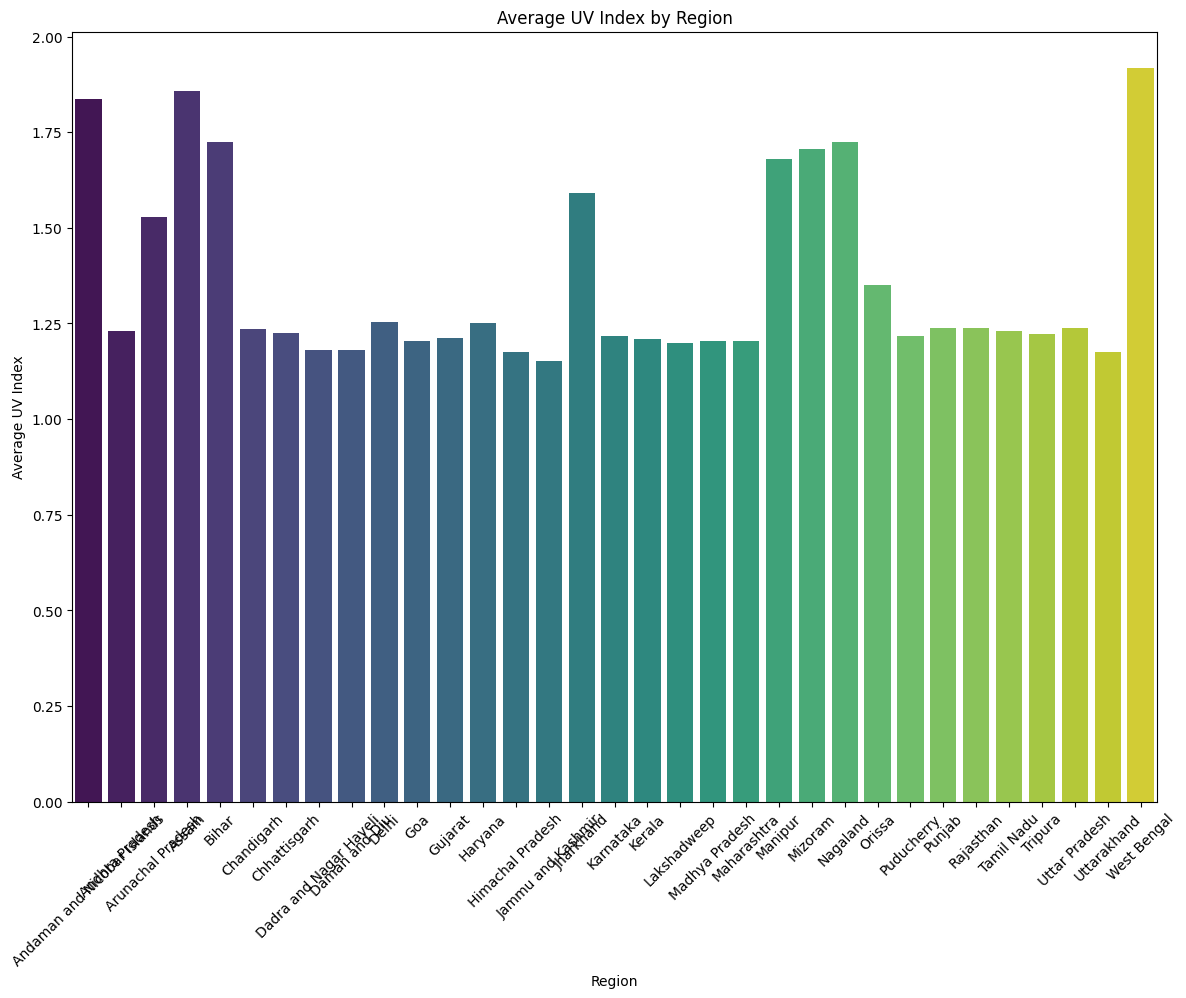

In [26]:
plt.figure(figsize=(14, 10))
avg_uv_index = df.groupby('region')['uv_index'].mean().reset_index()
sns.barplot(data=avg_uv_index, x='region', y='uv_index', palette='viridis')
plt.xlabel('Region')
plt.ylabel('Average UV Index')
plt.title('Average UV Index by Region')
plt.xticks(rotation=45)
plt.show()

In [30]:
features = list(df.select_dtypes(include = np.number).columns)
features

['latitude', 'longitude', 'last_updated_epoch', 'temperature_celsius', 'temperature_fahrenheit', 'wind_mph', 'wind_kph', 'wind_degree', 'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km', 'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'moon_illumination']


In [39]:
len(features)

30

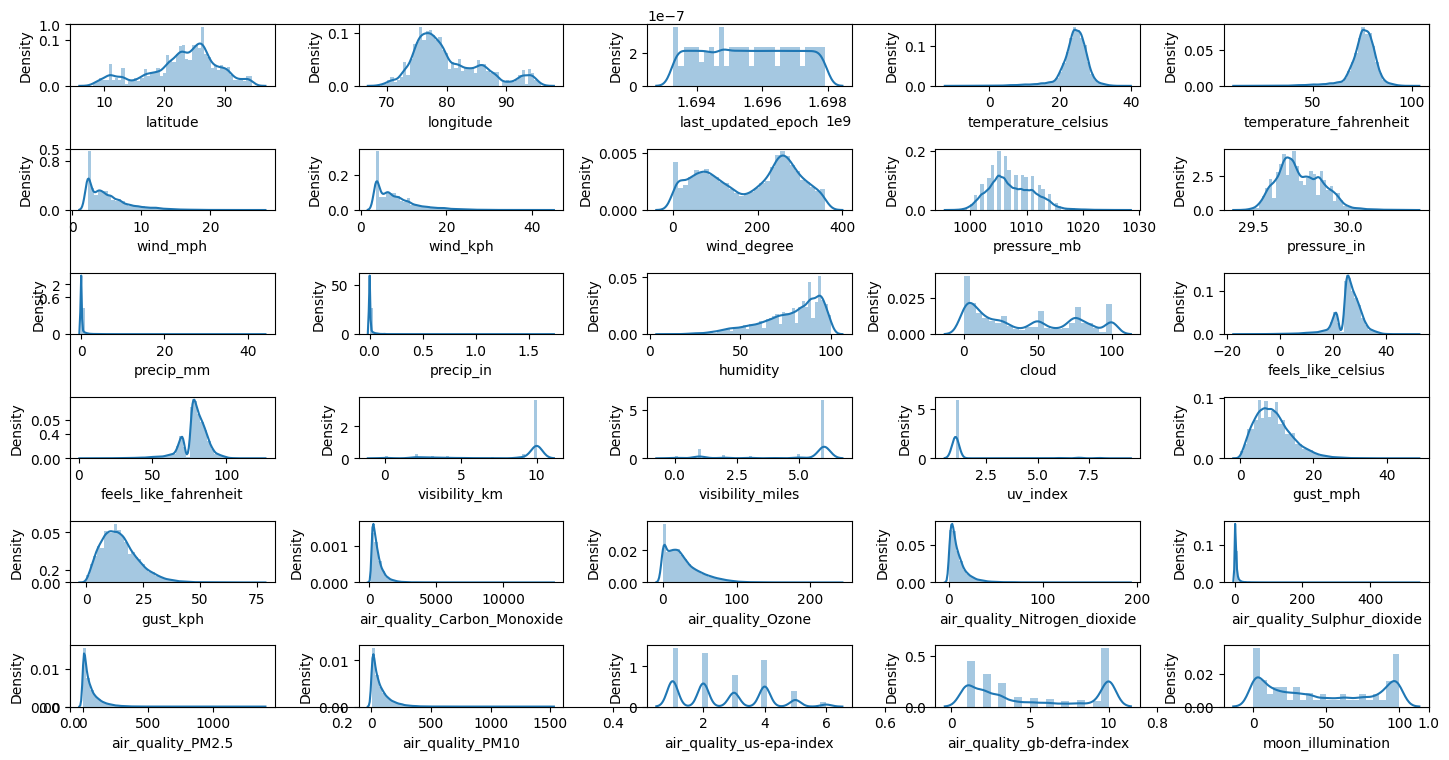

In [42]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(6,5, i + 1)
  sns.distplot(df[col])
plt.tight_layout()
plt.show()

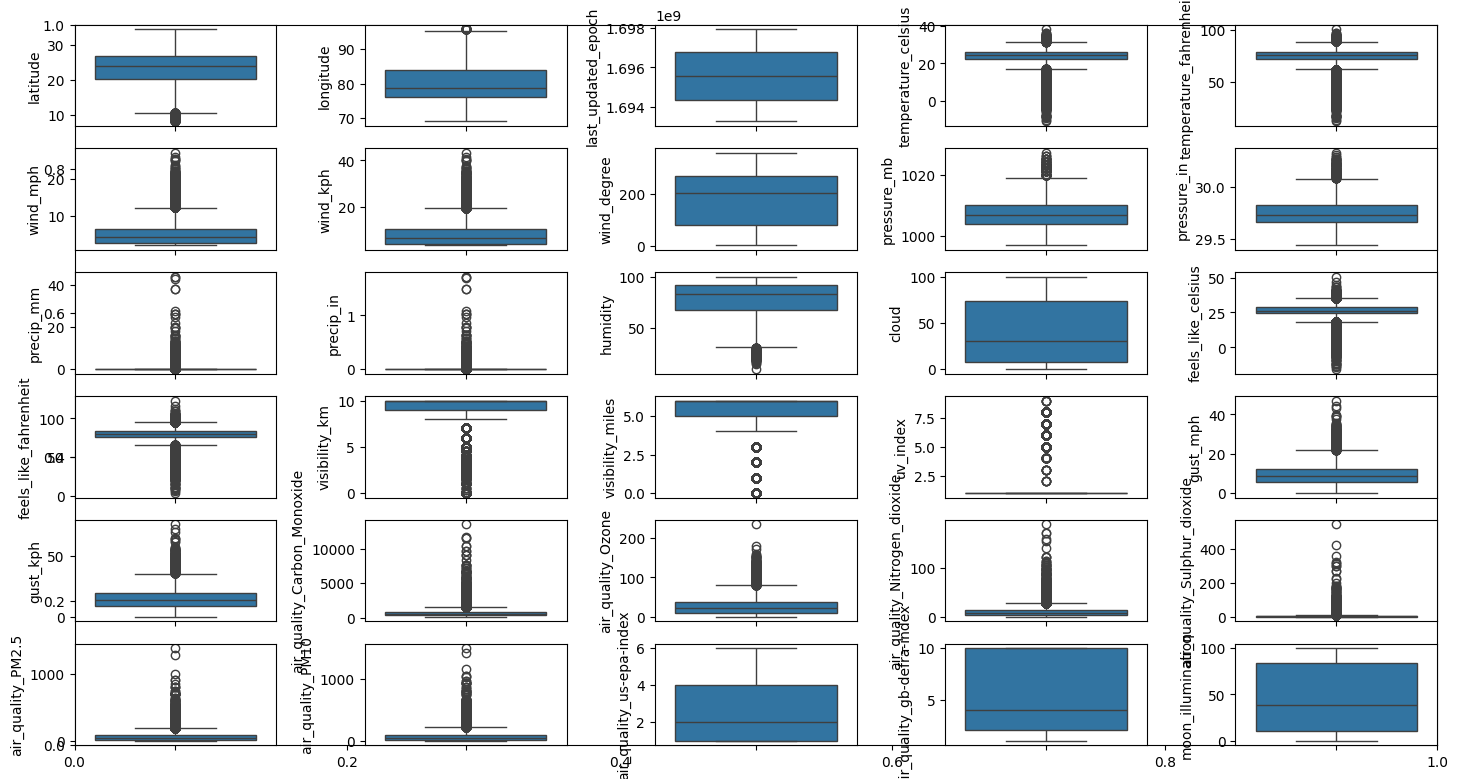

In [44]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(6,5, i + 1)
  sns.boxplot(df[col])
plt.tight_layout()
plt.show()


In [46]:
features_to_drop = [
    'country', 'location_name', 'region', 'latitude', 'longitude',
    'timezone', 'last_updated_epoch', 'last_updated', 'sunrise', 'sunset',
    'moonrise', 'moonset', 'moon_phase', 'moon_illumination'
]
df = df.drop(columns=features_to_drop)
df

,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,...,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index
0,27.5,81.5,Partly cloudy,12.8,20.5,281,WNW,1008.0,29.77,0.00,...,14.8,23.8,243.7,45.8,1.7,3.1,12.6,18.5,1,2
1,27.5,81.5,Sunny,9.6,15.5,287,WNW,1008.0,29.78,0.00,...,11.2,18.0,240.3,38.3,2.1,2.6,10.7,14.2,1,1
2,26.3,79.3,Partly cloudy,11.4,18.4,317,NW,1009.0,29.78,0.00,...,13.2,21.2,220.3,57.2,0.6,1.7,16.8,20.7,2,2
3,25.6,78.1,Cloudy,10.5,16.9,297,WNW,1009.0,29.80,0.00,...,13.0,20.9,200.3,25.0,1.2,1.1,4.9,6.6,1,1
4,27.2,81.0,Cloudy,10.1,16.2,274,W,1009.0,29.79,0.00,...,11.6,18.7,257.0,30.8,2.2,1.8,11.4,14.8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30088,21.0,69.8,Mist,2.2,3.6,10,N,1016.0,30.00,0.00,...,8.9,14.4,1455.3,14.1,26.4,4.7,144.9,192.0,4,10
30089,20.2,68.4,Patchy rain possible,2.2,3.6,100,E,1014.0,29.95,0.08,...,3.2,5.2,390.5,2.1,5.4,1.1,45.4,53.3,3,5
30090,23.3,74.0,Clear,4.7,7.6,310,NW,1012.0,29.89,0.00,...,8.7,14.0,767.7,39.3,7.8,1.2,81.1,88.7,4,10
30091,22.7,72.9,Patchy rain possible,2.2,3.6,284,WNW,1012.0,29.89,0.23,...,3.8,6.0,487.3,11.3,3.1,0.7,48.7,51.2,3,6


In [47]:
# Assuming 'precip_mm' is the target variable for rainfall prediction
X = df.drop(columns=['precip_mm'])
y = df['precip_mm']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [51]:
# Display the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (22569, 27)
X_test shape: (7524, 27)
y_train shape: (22569,)
y_test shape: (7524,)
